<a href="https://colab.research.google.com/github/Naman397/Exploratory_Data_Analysis/blob/main/22BDS0021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REGNO - 22BDS0021
## NAME - NAMAN KULSHRESTHA
## DATASET LINK - https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv

## GITHUB LINK - https://github.com/Naman397/Exploratory_Data_Analysis.git
# EXPLORATORY DATA ANALYSIS PROJECT


IMPORT DATASET

In [ ]:
import pandas as pd
import numpy as np

naman=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv')
naman.head(6)

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,1,0,786,190,10,0.1,0,3,0,0,0
1,2,0,794,182,10,0.0,0,3,0,0,0
2,3,0,798,178,20,0.0,0,1,0,0,0
3,4,0,800,176,70,0.3,0,1,0,1,0
4,5,0,804,172,40,0.3,0,1,0,1,0
5,6,0,808,168,60,0.3,0,1,0,1,0


DATA DIMENSIONS

In [ ]:
dim=naman.shape
print('Dimensions of the dataset:\n No of Rows:',dim[0],"\n No of Columns:",dim[1])

Dimensions of the dataset:
 No of Rows: 1592 
 No of Columns: 11


DATA TYPES AND BASIC DATASET INFO

In [ ]:
naman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1592 non-null   int64  
 1   Gunnel    1592 non-null   int64  
 2   Time      1592 non-null   int64  
 3   Fromlow   1592 non-null   int64  
 4   Slope     1592 non-null   int64  
 5   Rw        1592 non-null   float64
 6   Amphiso   1592 non-null   int64  
 7   Subst     1592 non-null   int64  
 8   Pool      1592 non-null   int64  
 9   Water     1592 non-null   int64  
 10  Cobble    1592 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 136.9 KB




MISSING VALUES PER COLUMN

In [ ]:
naman.isnull().sum()

,0
rownames,0
Gunnel,0
Time,0
Fromlow,0
Slope,0
Rw,0
Amphiso,0
Subst,0
Pool,0
Water,0


DUPLICATE ROWS

In [ ]:
print("Duplicate rows:", naman.duplicated().sum())

Duplicate rows: 0


DATA SUMMARY

In [ ]:
naman.describe()

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,796.500000,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,459.715129,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,1.000000,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,398.750000,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,796.500000,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1194.250000,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1592.000000,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


Data Handling - Type Conversion



In [ ]:
# Cell 6
obj_cols = naman.select_dtypes(include='object').columns.tolist()
print("Object columns:", obj_cols)

for c in obj_cols:
    try:
        naman[c + "_numeric_try"] = pd.to_numeric(naman[c].str.replace(',',''), errors='coerce')
    except Exception:
        pass

converted = [c for c in naman.columns if c.endswith("_numeric_try")]
if converted:
    display(naman[converted].head())
    naman.drop(columns=converted, inplace=True)


Object columns: []


Data Cleaning - Missing Values, Duplicates


In [ ]:
if naman.duplicated().any():
    naman = naman.drop_duplicates().reset_index(drop=True)


In [ ]:
num_cols = naman.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if naman[c].isnull().sum() > 0:
        naman[c].fillna(naman[c].median(), inplace=True)

cat_cols = naman.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    if naman[c].isnull().sum() > 0:
        naman[c].fillna(naman[c].mode().iloc[0], inplace=True)

print("Missing values after imputation:")
display(naman.isnull().sum())


Missing values after imputation:


,0
rownames,0
Gunnel,0
Time,0
Fromlow,0
Slope,0
Rw,0
Amphiso,0
Subst,0
Pool,0
Water,0


## Univariate Analysis


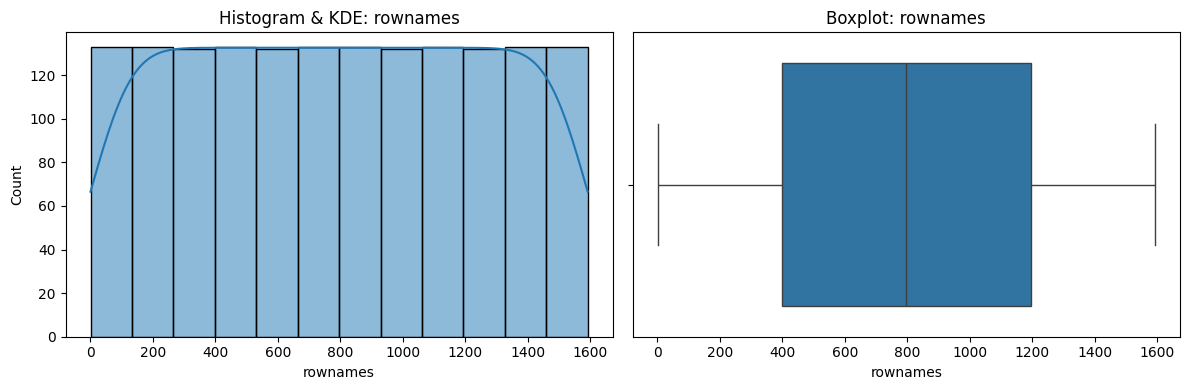

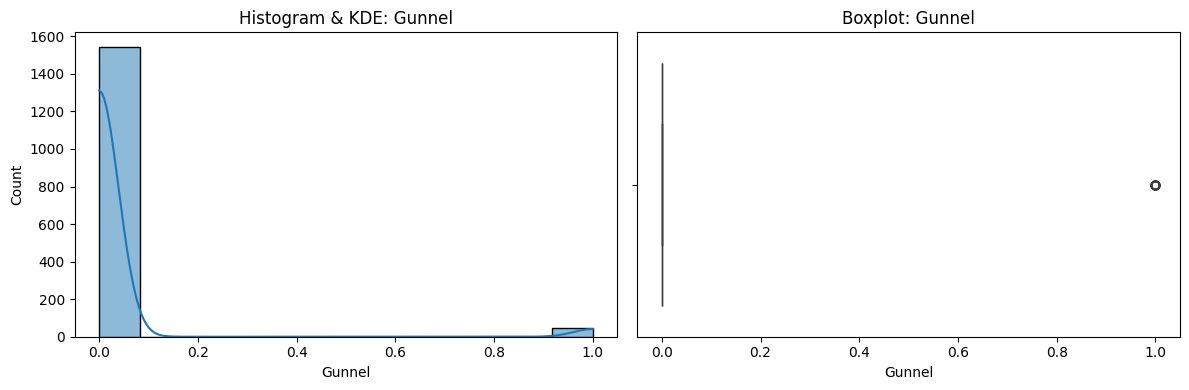

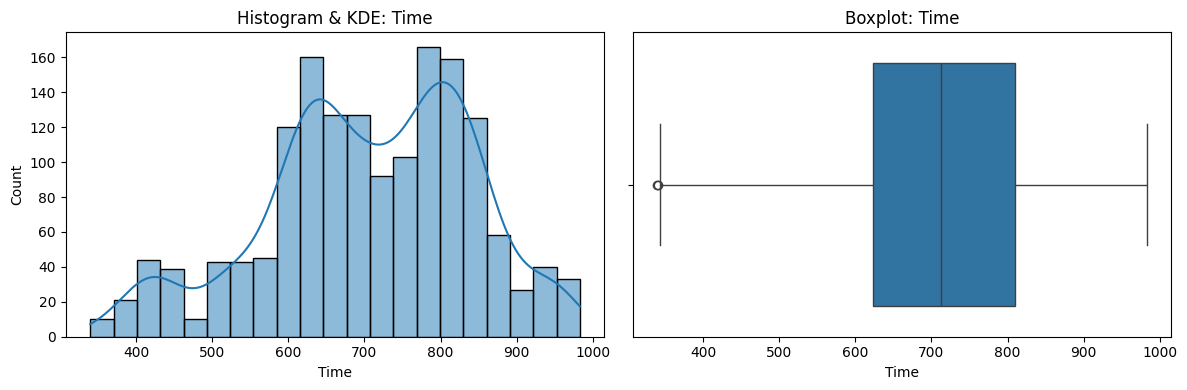

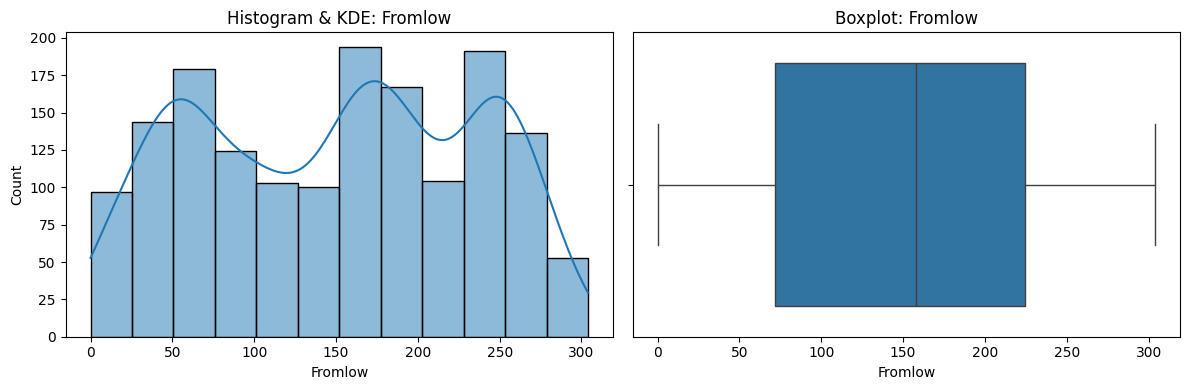

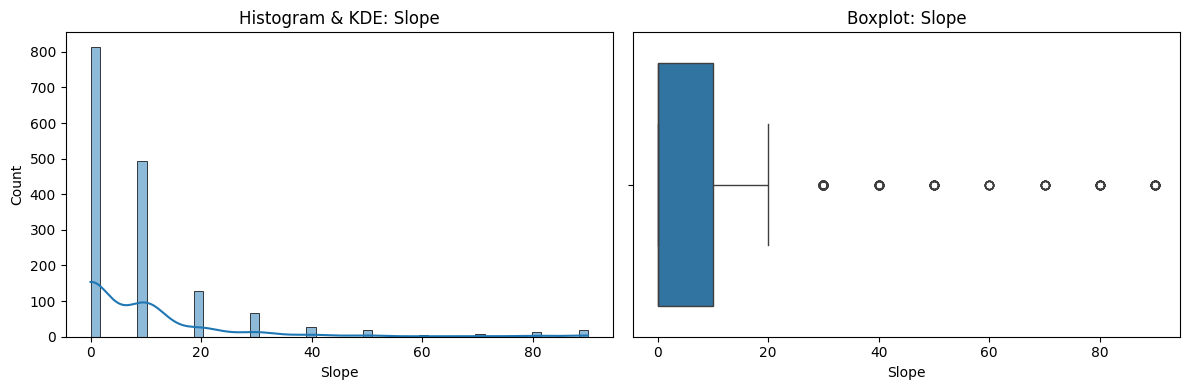

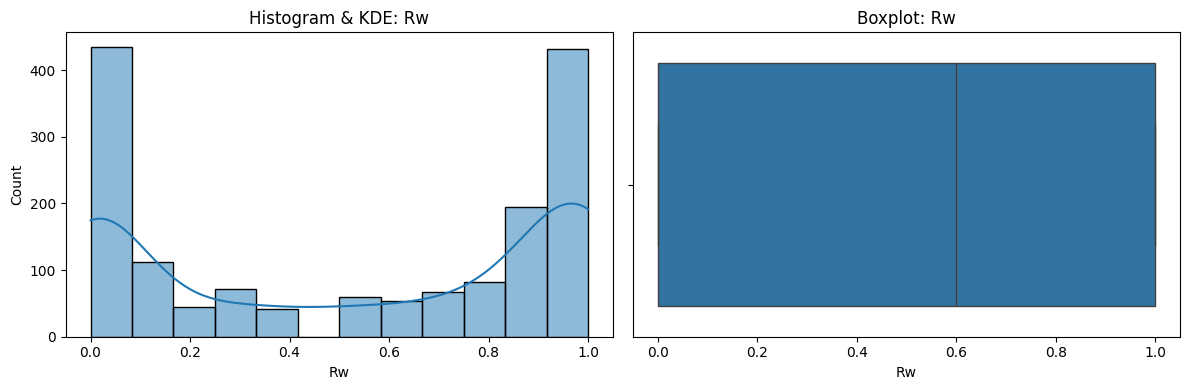

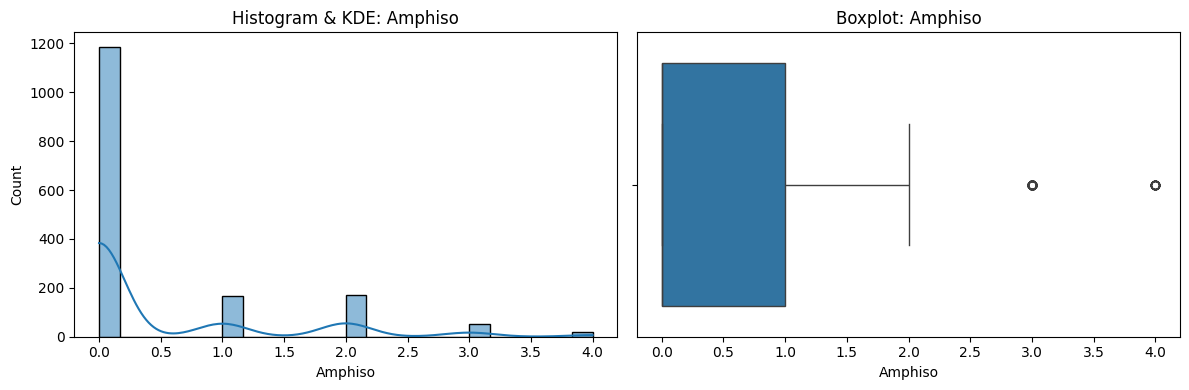

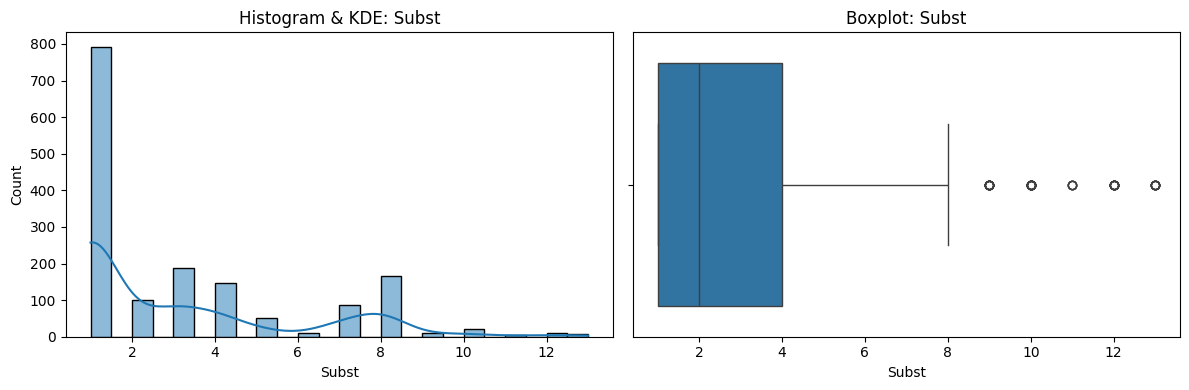

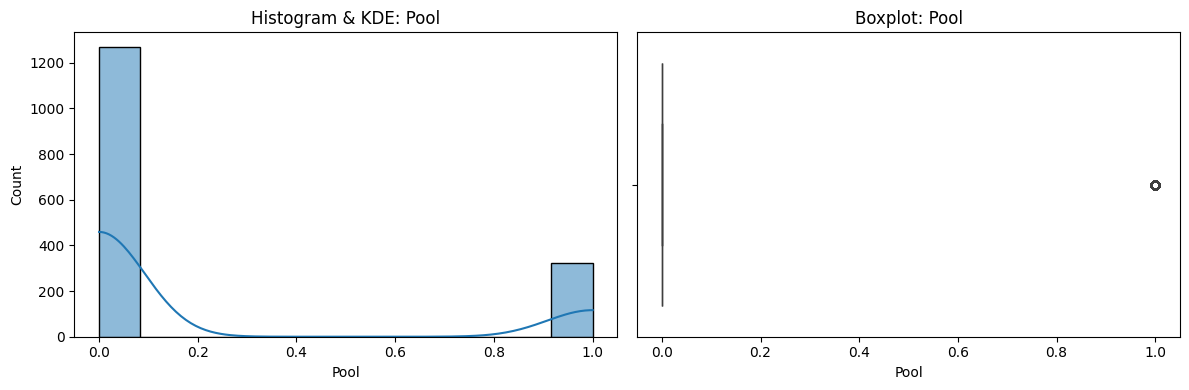

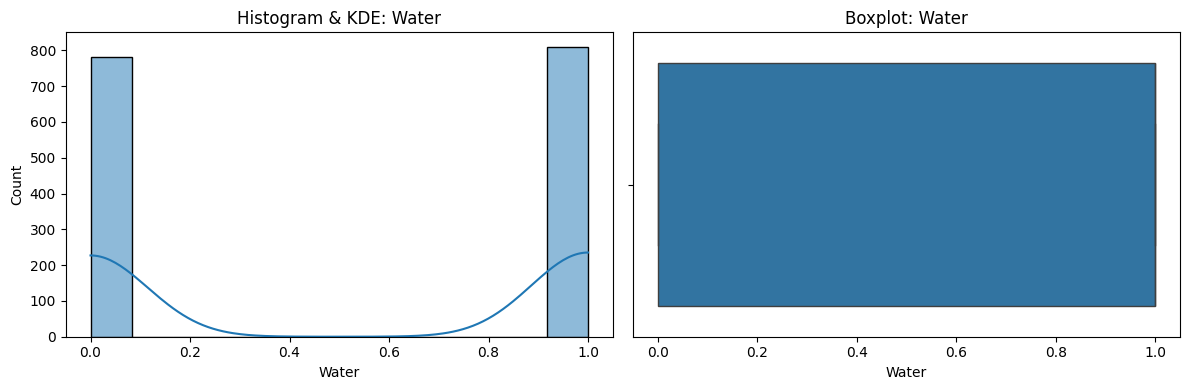

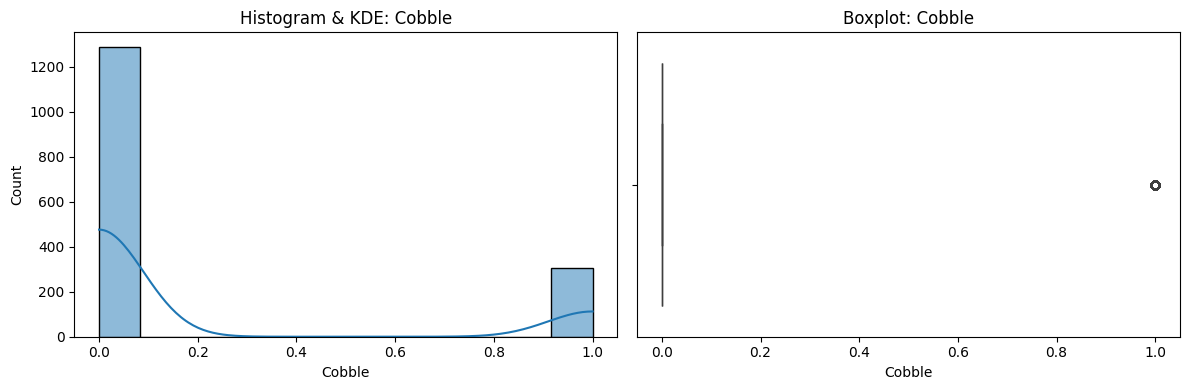

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(naman[c].dropna(), kde=True)
    plt.title(f"Histogram & KDE: {c}")
    plt.subplot(1,2,2)
    sns.boxplot(x=naman[c])
    plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()


## Bivariate Analysis — Correlation Heatmap


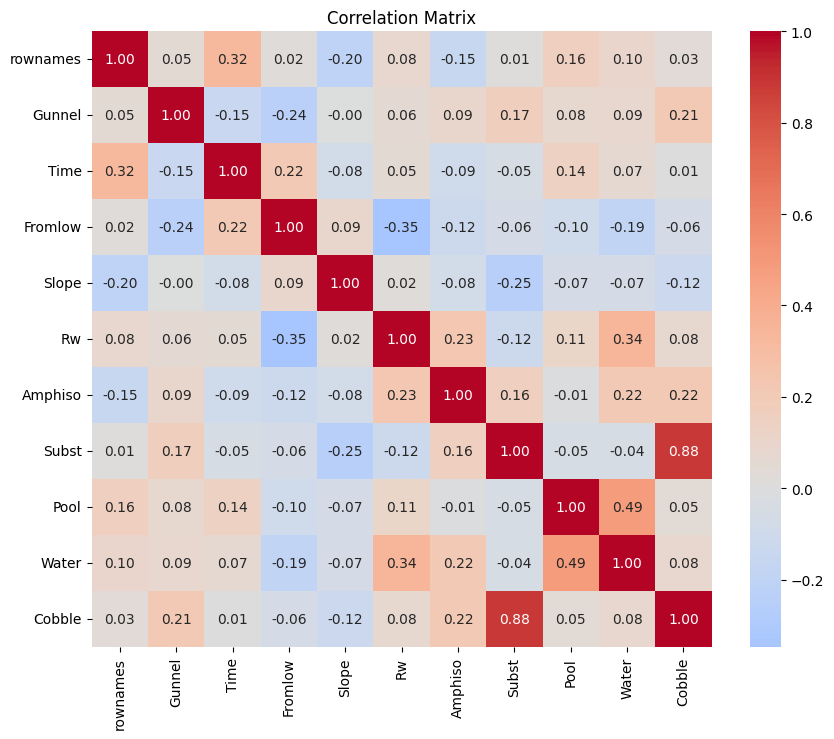

In [ ]:
if len(num_cols) >= 2:
    corr = naman[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title("Correlation Matrix")
    plt.show()


## Multivariate Analysis - Pairplot


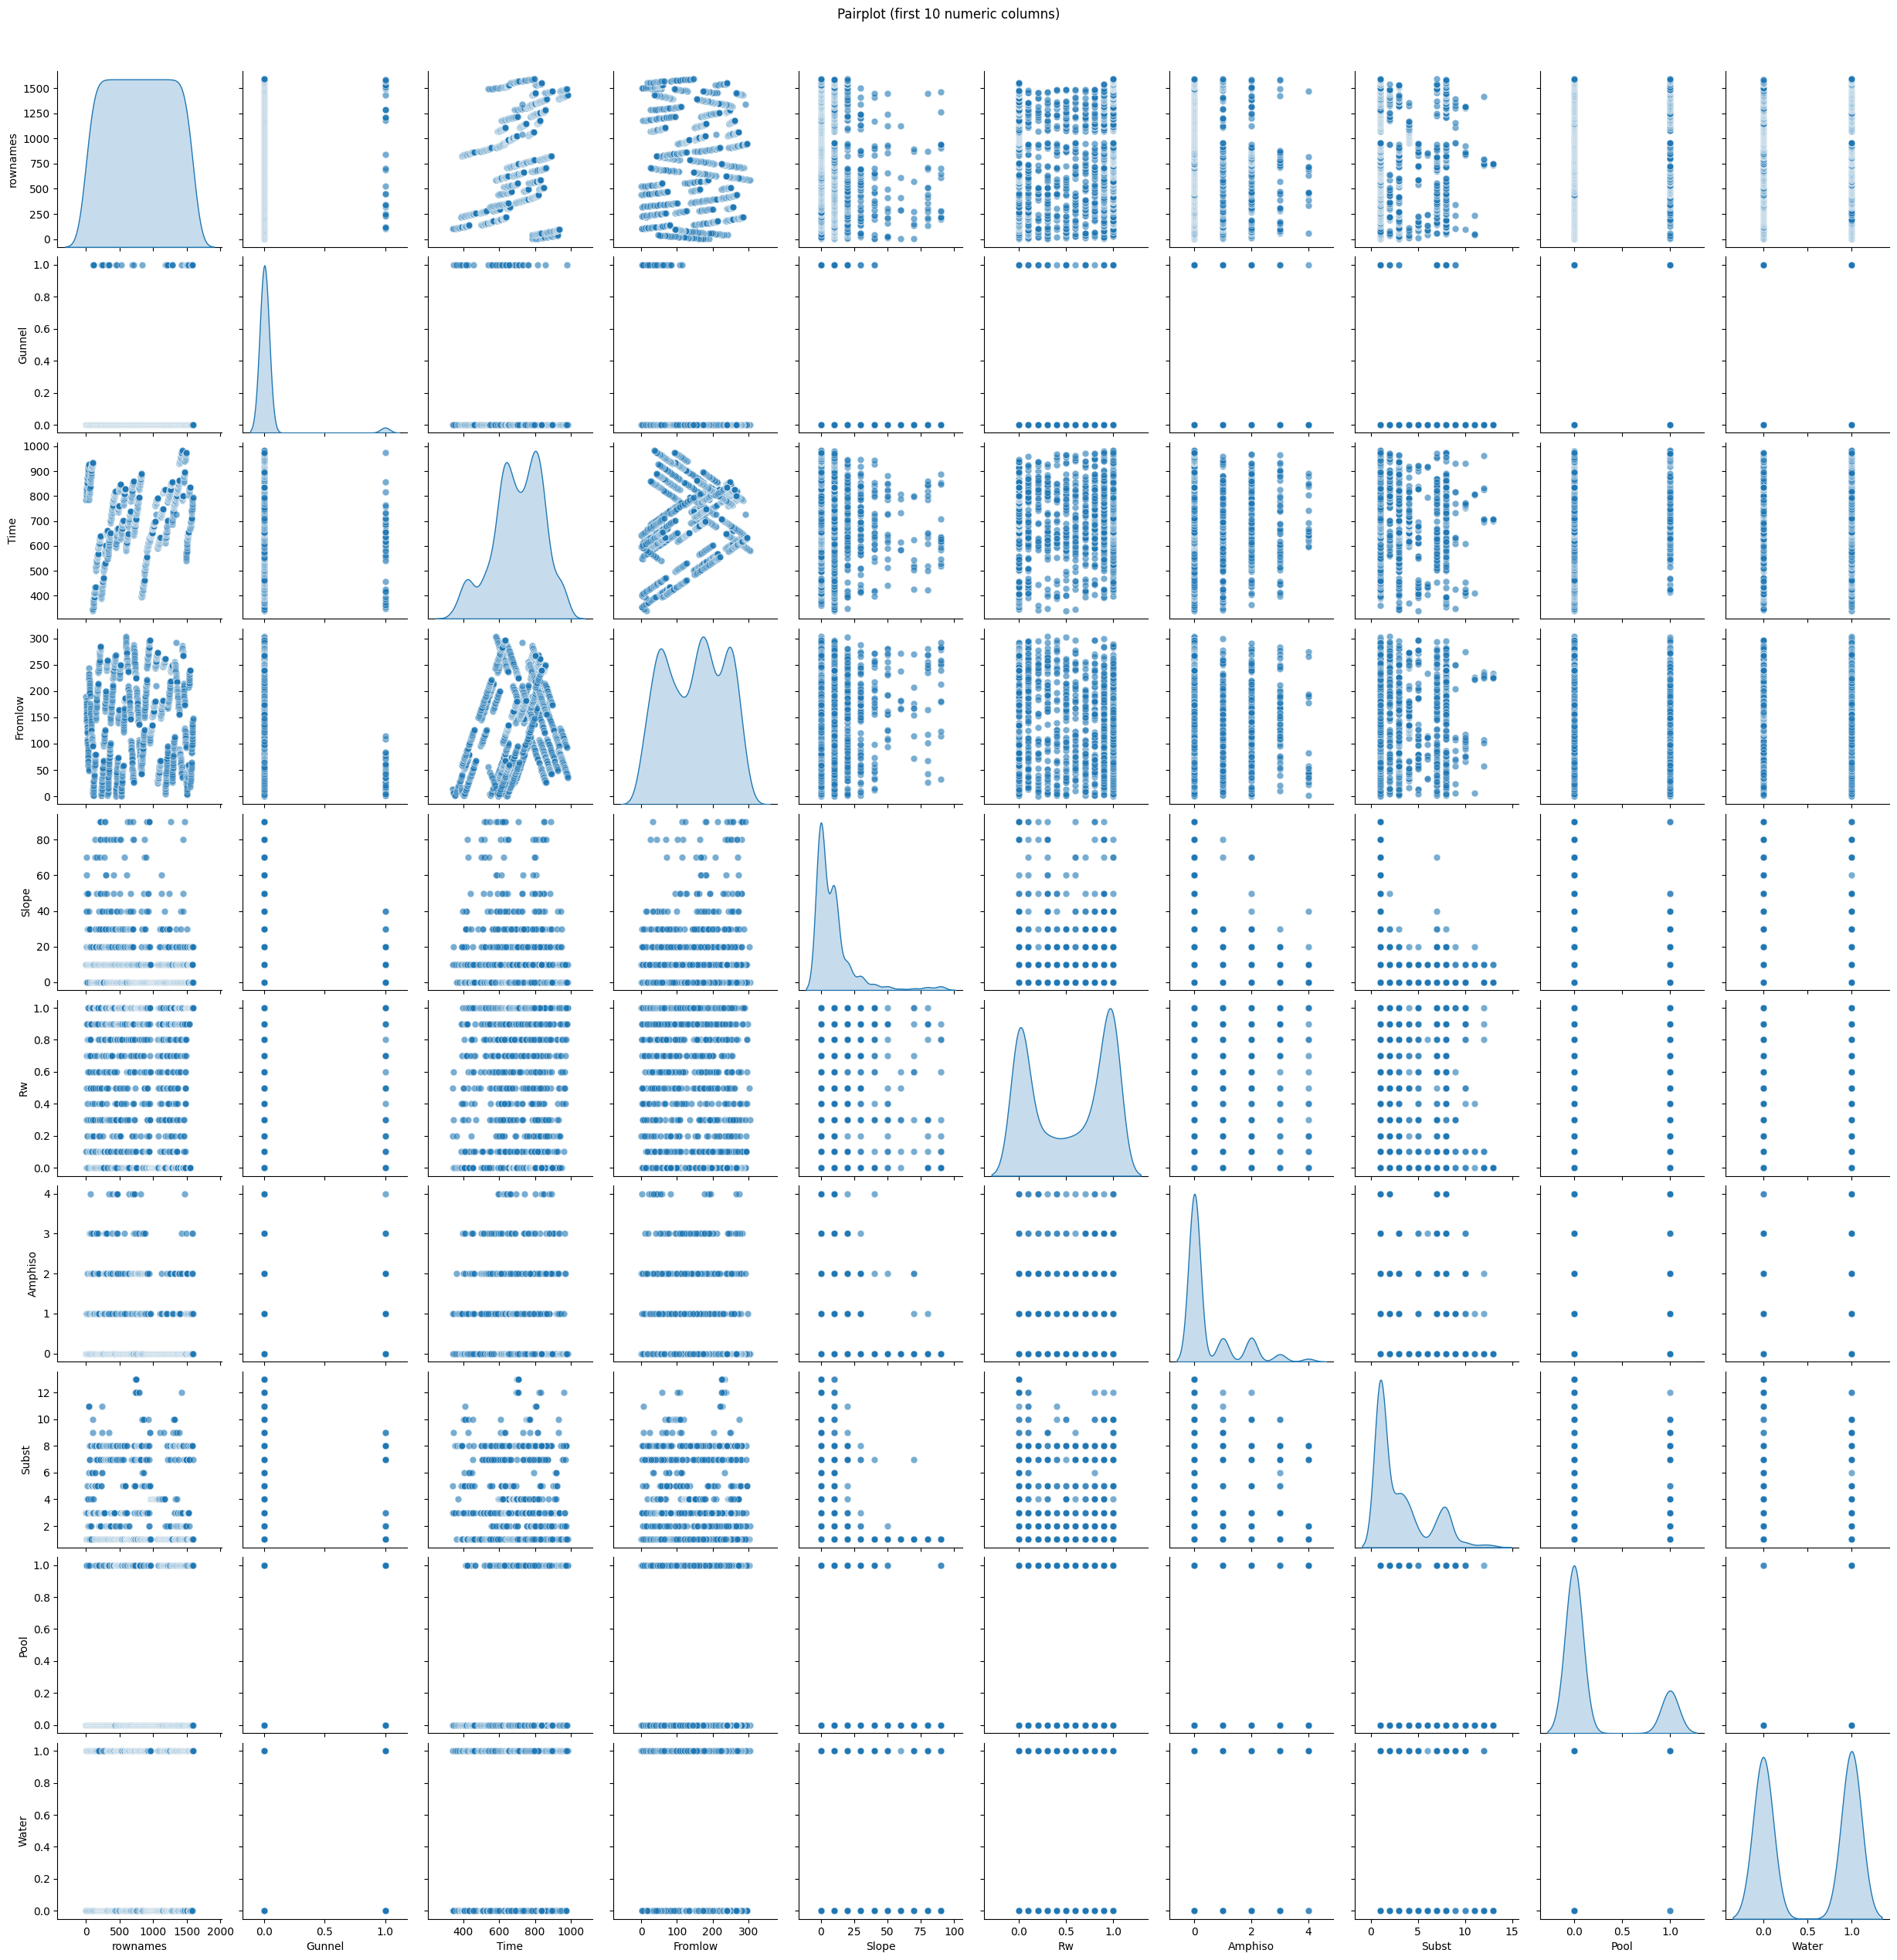

In [ ]:
if len(num_cols) > 1:
    sample_cols = num_cols[:10]
    sns.pairplot(naman[sample_cols].dropna(), diag_kind='kde',plot_kws={'alpha':0.6, 's':40})
    plt.suptitle("Pairplot (first 10 numeric columns)", y=1.02)
    plt.show()



## Outlier Detection — IQR Method


In [ ]:
outlier_summary = {}
for c in num_cols:
    Q1 = naman[c].quantile(0.25)
    Q3 = naman[c].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    n_out = ((naman[c] < lower) | (naman[c] > upper)).sum()
    outlier_summary[c] = {'lower': lower, 'upper': upper, 'n_outliers': int(n_out)}

pd.DataFrame(outlier_summary).T



,lower,upper,n_outliers
rownames,-794.5,2387.5,0.0
Gunnel,0.0,0.0,48.0
Time,342.5,1090.5,2.0
Fromlow,-157.0,453.0,0.0
Slope,-15.0,25.0,158.0
Rw,-1.5,2.5,0.0
Amphiso,-1.5,2.5,72.0
Subst,-3.5,8.5,52.0
Pool,0.0,0.0,322.0
Water,-1.5,2.5,0.0


## The dataset given does not have any attribute in YYYY-MM-DD or HH:MM:SS format so skipping time-series analysis

## 1D analysis

In [ ]:
# Skewness for numerical columns
num_cols = ['Time', 'Fromlow', 'Slope', 'Rw']
print("\nSkewness:")
print(naman[num_cols].skew())


Skewness:
Time      -0.393544
Fromlow   -0.065813
Slope      2.955768
Rw        -0.143814
dtype: float64


In [ ]:
# Quantiles
print("\nQuantiles:")
print(naman[num_cols].quantile([0.25, 0.5, 0.75]))



Quantiles:
       Time  Fromlow  Slope   Rw
0.25  623.0    71.75    0.0  0.0
0.50  712.5   158.00    0.0  0.6
0.75  810.0   224.25   10.0  1.0


In [ ]:
# Frequency counts for categorical columns
cat_cols = ['Gunnel','Amphiso','Subst','Pool','Water','Cobble']
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(naman[col].value_counts())


Value counts for Gunnel:
Gunnel
0    1544
1      48
Name: count, dtype: int64

Value counts for Amphiso:
Amphiso
0    1186
2     169
1     165
3      52
4      20
Name: count, dtype: int64

Value counts for Subst:
Subst
1     792
3     188
8     166
4     147
2     100
7      86
5      50
10     20
6      11
9      11
12     10
13      7
11      4
Name: count, dtype: int64

Value counts for Pool:
Pool
0    1270
1     322
Name: count, dtype: int64

Value counts for Water:
Water
1    810
0    782
Name: count, dtype: int64

Value counts for Cobble:
Cobble
0    1288
1     304
Name: count, dtype: int64


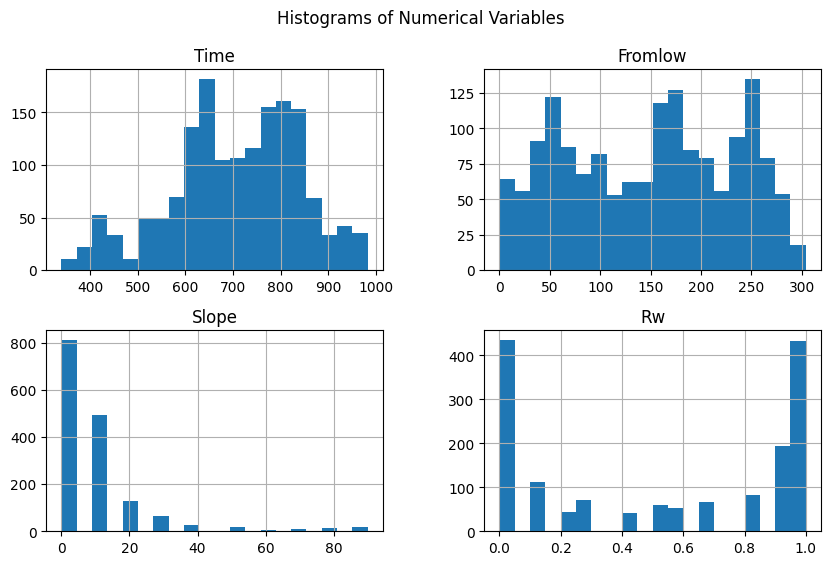

In [ ]:
# Histograms
naman[num_cols].hist(bins=20, figsize=(10,6))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

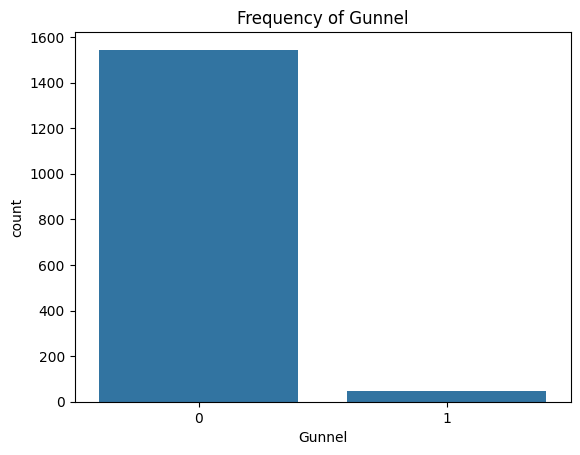

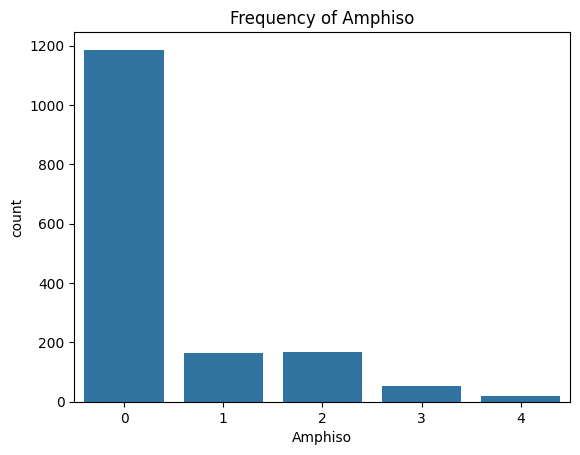

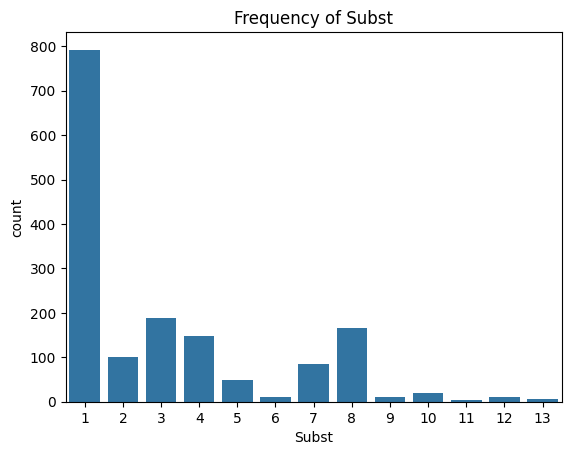

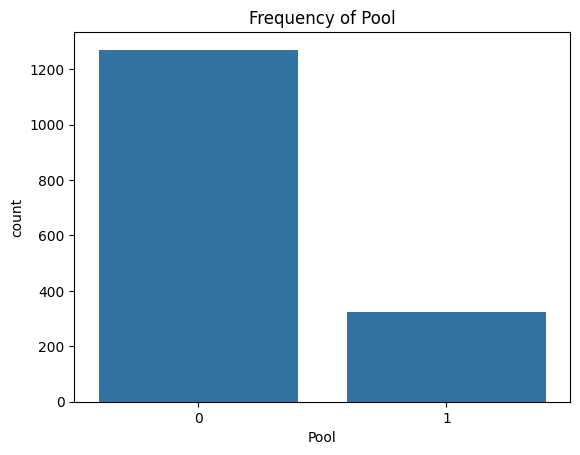

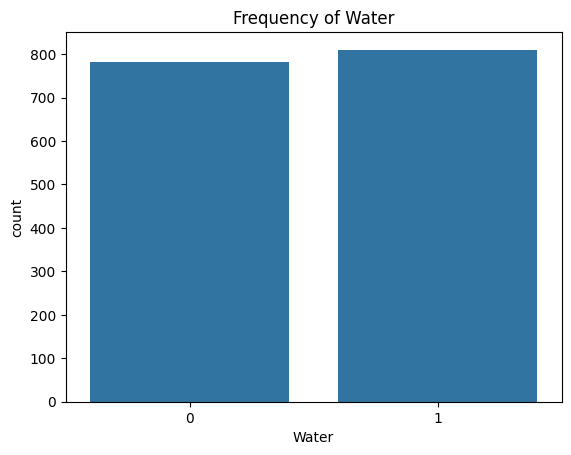

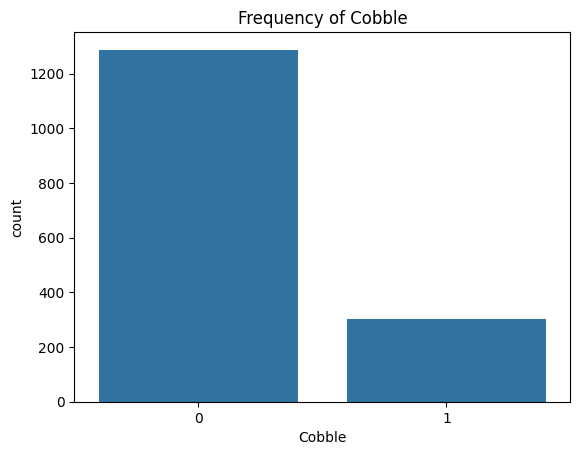

In [ ]:
# Bar plots for categorical
for col in cat_cols:
    sns.countplot(x=col, data=naman)
    plt.title(f"Frequency of {col}")
    plt.show()

## 2D analysis

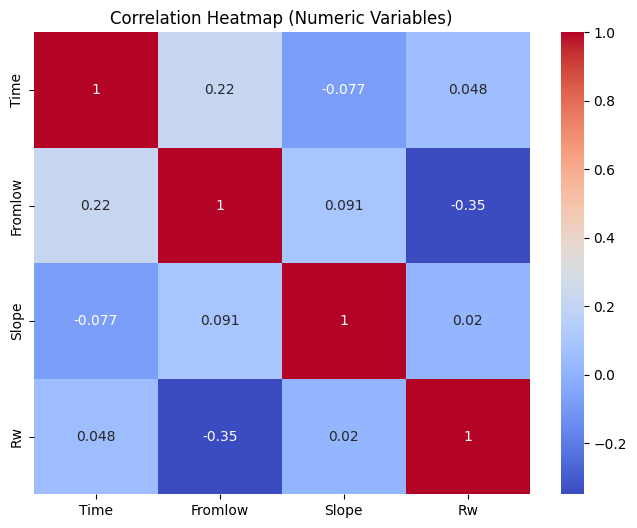

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(naman[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


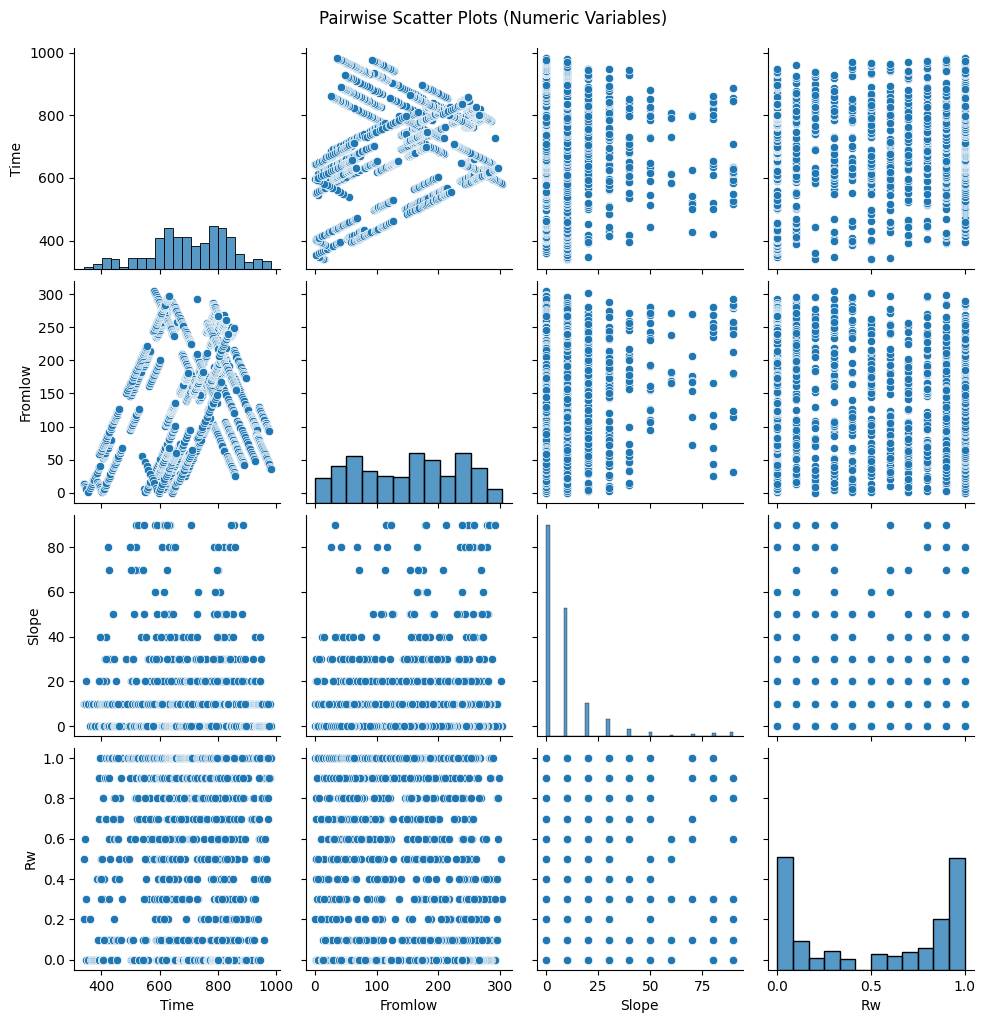

In [ ]:

# Scatter plots (numeric vs numeric)
sns.pairplot(naman[num_cols])
plt.suptitle("Pairwise Scatter Plots (Numeric Variables)", y=1.02)
plt.show()



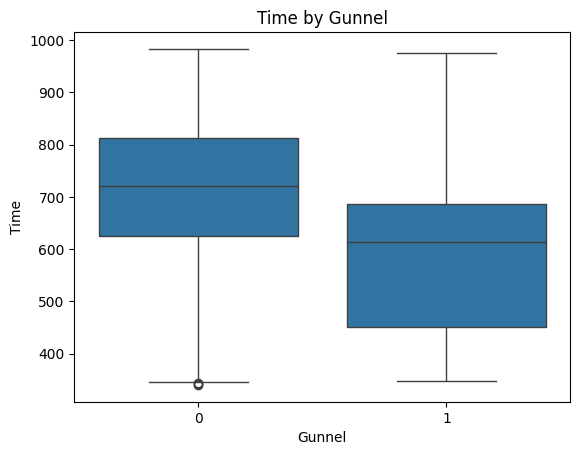

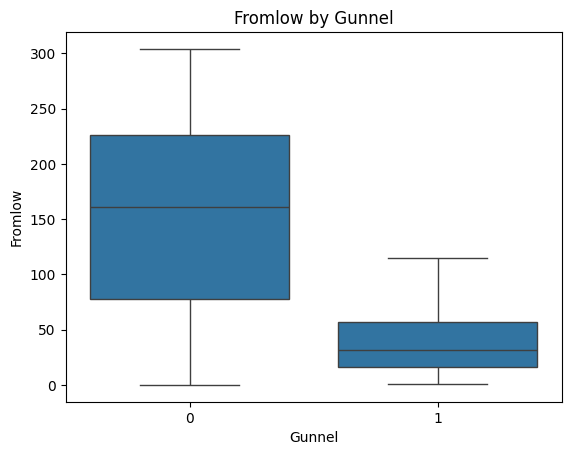

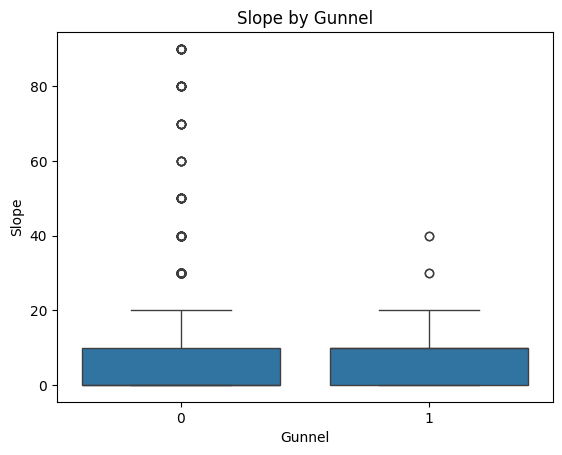

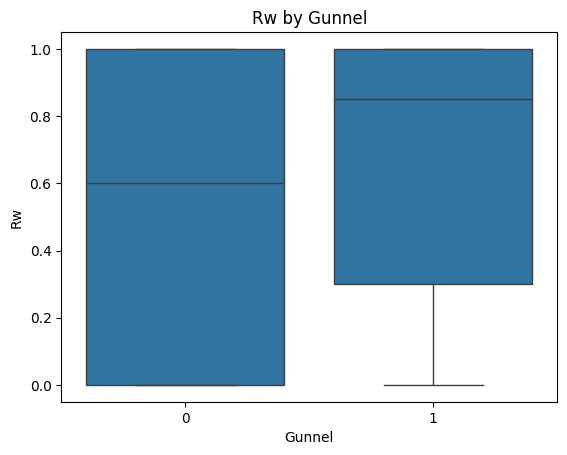

In [ ]:

# Numerical vs categorical (boxplots)
for col in num_cols:
    sns.boxplot(x="Gunnel", y=col, data=naman)
    plt.title(f"{col} by Gunnel")
    plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Categorical vs categorical
cross_tab = pd.crosstab(naman["Gunnel"], naman["Pool"])
chi2, p, dof, ex = chi2_contingency(cross_tab)
print("\nCross Tab Gunnel vs Pool:\n", cross_tab)
print(f"Chi-square Test: chi2={chi2:.2f}, p={p:.4f}")


Cross Tab Gunnel vs Pool:
 Pool       0    1
Gunnel           
0       1240  304
1         30   18
Chi-square Test: chi2=8.08, p=0.0045


## 3D analysis

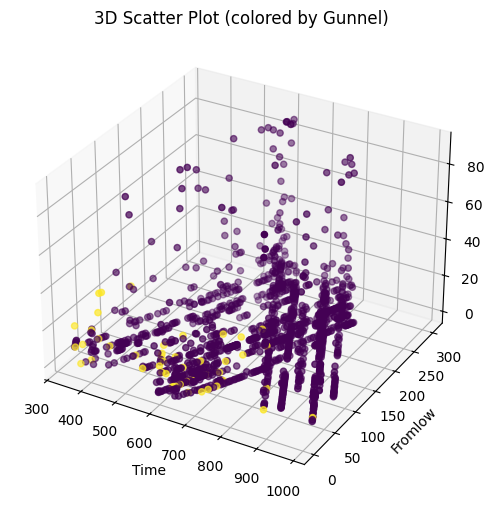

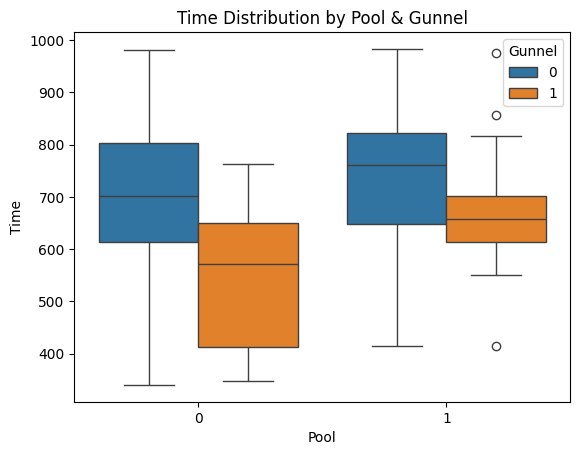

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(naman["Time"], naman["Fromlow"], naman["Slope"], c=naman["Gunnel"], cmap="viridis")
ax.set_xlabel("Time")
ax.set_ylabel("Fromlow")
ax.set_zlabel("Slope")
plt.title("3D Scatter Plot (colored by Gunnel)")
plt.show()

# Boxplots for multiple categories
sns.boxplot(x="Pool", y="Time", hue="Gunnel", data=naman)
plt.title("Time Distribution by Pool & Gunnel")
plt.show()

## CLUSTERING METHOD

Cluster centers (scaled):
 [[ 0.260486    0.73067458 -0.28936449 -0.96882648]
 [-0.14929895 -0.52865239 -0.12185253  0.65220156]
 [-0.21415931  0.62785635  3.45526725 -0.28725278]]

Cluster counts:
 Cluster
1    918
0    592
2     82
Name: count, dtype: int64


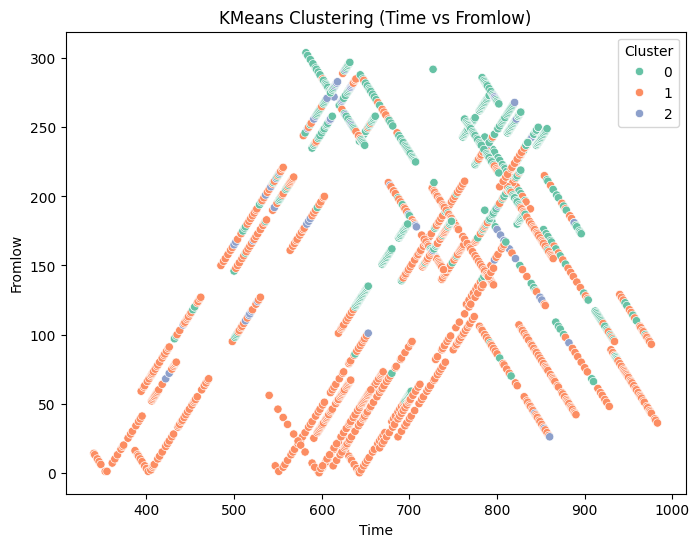

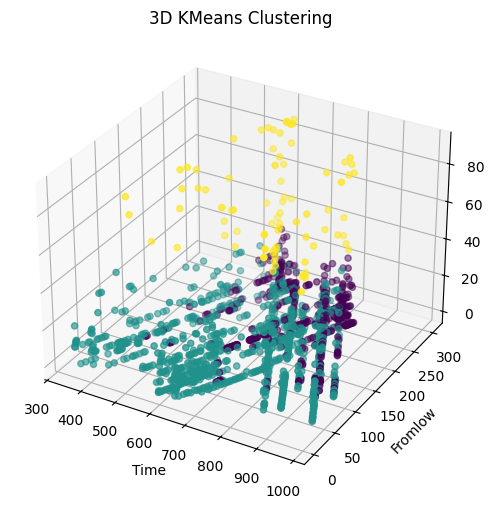

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Time', 'Fromlow', 'Slope', 'Rw']
X = naman[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
naman['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster centers (scaled):\n", kmeans.cluster_centers_)
print("\nCluster counts:\n", naman['Cluster'].value_counts())

plt.figure(figsize=(8,6))
sns.scatterplot(x=naman['Time'], y=naman['Fromlow'], hue=naman['Cluster'], palette='Set2')
plt.title("KMeans Clustering (Time vs Fromlow)")
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(naman['Time'], naman['Fromlow'], naman['Slope'], c=naman['Cluster'], cmap='viridis')
ax.set_xlabel("Time")
ax.set_ylabel("Fromlow")
ax.set_zlabel("Slope")
plt.title("3D KMeans Clustering")
plt.show()


## PRINCIPLE COMPONENT ANALYSIS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = naman.drop(columns=['rownames'])
X = df.drop(columns=['Gunnel'])
y = df['Gunnel']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Gunnel'] = y

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.23548    0.20311631]


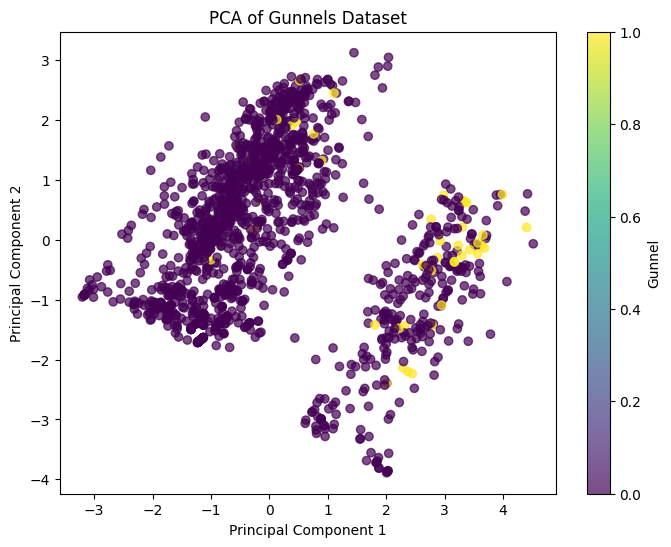

In [ ]:
# 2D PCA plot
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Gunnel'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gunnels Dataset')
plt.colorbar(label='Gunnel')
plt.show()


In [ ]:
# PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
print(loadings)

              PC1       PC2
Time    -0.026194  0.066504
Fromlow -0.260726 -0.276818
Slope   -0.245165  0.075208
Rw       0.236779  0.443027
Amphiso  0.335621  0.101070
Subst    0.515986 -0.444651
Pool     0.182958  0.396068
Water    0.296854  0.497498
Cobble   0.560969 -0.323598


## REGRESSION MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

naman_r = naman.drop(columns=['rownames'])

X = naman_r.drop(columns=['Gunnel'])
y = naman_r['Gunnel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDRegressor(
    max_iter=100,
    tol=1e-4,
    learning_rate='adaptive',
    eta0=0.01,
    random_state=42
)
train_losses = []
test_losses = []

epochs = 100
for epoch in range(epochs):
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)


new_data = pd.DataFrame([{
    'Time': 2.3,
    'Fromlow': 0.8,
    'Slope': 0.15,
    'Rw': 4.2,
    'Amphiso': 0.6,
    'Subst': 3.0,
    'Pool': 1.2,
    'Water': 0.9,
    'Cobble': 2.5
}])

new_data_scaled = scaler.transform(new_data)

predicted_gunnel = model.predict(new_data_scaled)
print(f"Predicted Gunnel value: {predicted_gunnel[0]:.3f}")


Predicted Gunnel value: 0.454


Final Test R² Score: 0.075
Final Test RMSE: 0.168


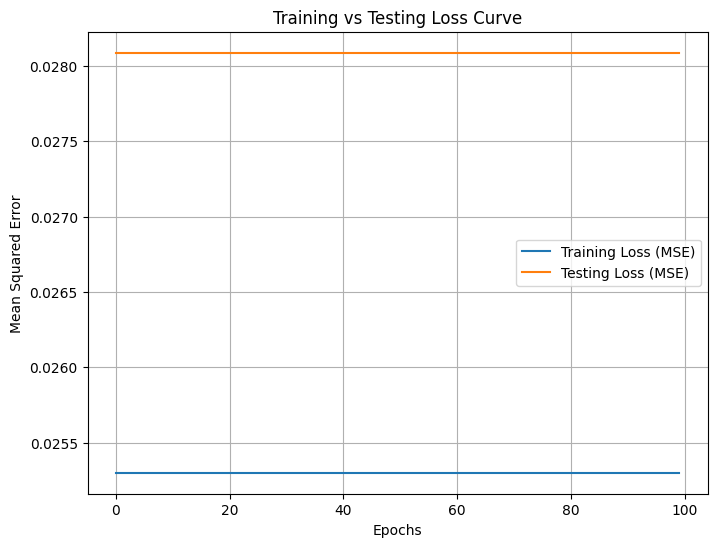

In [ ]:
final_r2 = r2_score(y_test, y_test_pred)
print(f"Final Test R² Score: {final_r2:.3f}")
print(f"Final Test RMSE: {np.sqrt(test_losses[-1]):.3f}")

plt.figure(figsize=(8,6))
plt.plot(range(epochs), train_losses, label='Training Loss (MSE)')
plt.plot(range(epochs), test_losses, label='Testing Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Testing Loss Curve')
plt.legend()
plt.grid(True)
plt.show()